In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
traindata = pd.read_csv('smalldata.txt', sep = ',')

In [3]:
import numpy as np
t = np.zeros(6000) #time
w = np.zeros(6000) #address
x = np.zeros(6000) #column
y = np.zeros(6000) #row
z = np.zeros(6000) #delay
a = np.zeros(6000) #addressgrowth
b = np.zeros(6000) #columngrowth
c = np.zeros(6000) #rowgrowth
d = np.zeros(6000) #timegrowth

In [4]:
for i in range (0, 5136):
    w[i] = traindata.address[i+1] - traindata.address[i]

In [5]:
for i in range (0, 5136):
    x[i] = traindata.column[i+1] - traindata.column[i]

In [6]:
for i in range (0, 5136):
    y[i] = traindata.row[i+1] - traindata.row[i]

In [7]:
for i in range (0, 5136):
    t[i] = traindata.time[i+1] - traindata.time[i]

In [8]:
for i in range (0, 5136):
    z[i] = traindata.delay[i]

In [9]:
for i in range (0, 5136):
    if (traindata.address[i+1] != traindata.address[i]):
        a[i] = (traindata.address[i+1] - traindata.address[i])/(traindata.address[i+1])
    else:
        a[i] = 0
 

In [10]:
for i in range (0, 5136):
    if (traindata.column[i+1] != traindata.column[i]):
        b[i] = (traindata.column[i+1] - traindata.column[i])/(traindata.column[i+1])
    else:
        b[i] = 0

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
for i in range (0, 5136):
    if (traindata.row[i+1] != traindata.row[i]):
        c[i] = (traindata.row[i+1] - traindata.row[i])/(traindata.row[i+1])
    else:
        c[i] = 0
    

In [12]:
for i in range (0, 5136):
    if (traindata.time[i+1] != traindata.time[i]):
        d[i] = (traindata.time[i+1] - traindata.time[i])/(traindata.time[i+1])
    else:
        d[i] = 0


In [14]:
import csv
#Working Code
with open('differencedata.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Addressdiff', 'addressgrowth','Columndiff', 'columngrowth', 'Rowdiff', 'rowgrowth', 'timediff','timegrowth','delay'])
    for i in range (0, 5137):
        writer.writerow([w[i], a[i], x[i], b[i], y[i], c[i], t[i], d[i], z[i]])


In [15]:
import seaborn as sns
newdata = pd.read_csv('differencedata.csv')
# Create the default pairplot
#newdata = newdata.abs()

In [17]:
sns.pairplot(newdata, hue="delay")

KeyError: 'address'

In [15]:
#file with only data points where the latency is changing
with open('changes.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['address', 'addressgrowth', 'column', 'columngrowth', 'row', 'rowgrowth', 'time', 'timegrowth' ,'delay'])
    
    for i in range (0, 5136):
        if (newdata.delay[i] != newdata.delay[i+1]):
            writer.writerow([newdata.Addressdiff[i], newdata.addressgrowth[i], newdata.Columndiff[i], newdata.columngrowth[i], newdata.Rowdiff[i], 
                             newdata.rowgrowth[i], newdata.timediff[i], newdata.timegrowth[i], newdata.delay[i]])
            writer.writerow([newdata.Addressdiff[i+1], newdata.addressgrowth[i+1], newdata.Columndiff[i+1], newdata.columngrowth[i+1], newdata.Rowdiff[i+1], 
                             newdata.rowgrowth[i+1], newdata.timediff[i+1], newdata.timegrowth[i+1], newdata.delay[i+1]])

In [16]:
changedata = pd.read_csv('changes.csv')

In [17]:
changedata.drop_duplicates(subset ="delay", keep = 'first', inplace = True)

In [18]:
#newdata.skew()
#X = np.array(newdata.values)
#X[:, 1] = np.log(X[:, 1])
#X[:, 3] = np.log(X[:, 3])
#newdata.skew()

<Figure size 3600x3600 with 0 Axes>

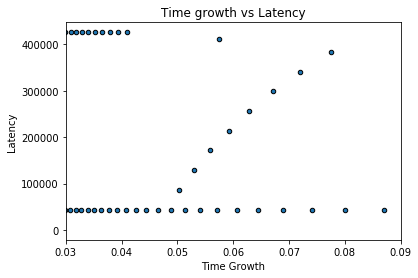

<Figure size 3600x3600 with 0 Axes>

In [19]:
import numpy as np
X = np.array(newdata.values)
#X[:, 1] = np.log(X[:, 1])
#X[:, 3] = np.log(X[:, 3])
plt.scatter(X[:,7], X[:,8], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Time growth vs Latency')
plt.xlim(0.03, 0.09)
#plt.ylim (-4, -2) #0,1000
plt.xlabel('Time Growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))

[ 0.         -0.69314718 -1.09861229 -1.38629436 -1.60943791 -1.79175947
 -1.94591015 -2.07944154 -0.36772478 -2.01490302 -4.60015764 -4.61015773
 -4.6200588  -4.6298628  -4.63957161 -4.64918707 -4.65871095 -4.66814499
 -2.85558564 -2.55681923 -2.63151012 -2.70100792 -2.76598804 -2.82700214
 -2.88450664 -2.93888341 -2.99045522 -3.19544557 -5.49349453 -7.76556908
 -6.41613011 -6.41776374 -8.66922735 -7.00418371 -9.53564332 -7.52128188
 -9.57910692 -7.70775417 -9.78866575 -9.78872184 -9.78877791 -9.78883399
 -9.78889006 -9.78894613 -7.91750833 -9.78936655 -7.64977665 -9.95842545
        -inf]


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


<Figure size 3600x3600 with 0 Axes>

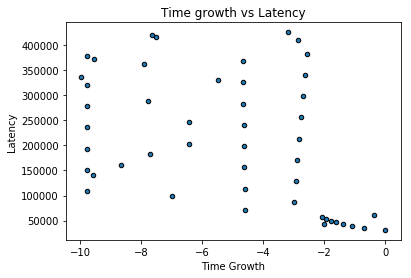

<Figure size 3600x3600 with 0 Axes>

In [21]:
#doing log transformation of the time growtj
import numpy as np
X = np.array(changedata.values)
X[:, 7] = np.log(X[:, 7])
#print (X[:, 7])
#X[:, 3] = np.log(X[:, 3])
plt.scatter(X[:,7], X[:,8], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Time growth vs Latency')
#plt.ylim (-4, -2) #0,1000
plt.xlabel('Time Growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


<Figure size 3600x3600 with 0 Axes>

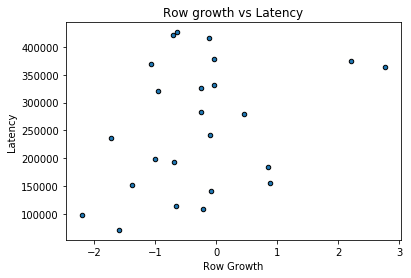

<Figure size 3600x3600 with 0 Axes>

In [22]:
#doing log transformation of the column difference
import numpy as np
X = np.array(changedata.values)
X[:, 5] = np.log(X[:, 5])
#X[:, 3] = np.log(X[:, 3])
plt.scatter(X[:,5], X[:,8], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Row growth vs Latency')
#plt.xlim(-4, 0.2)
#plt.ylim (-4, -2) #0,1000
plt.xlabel('Row Growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


<Figure size 3600x3600 with 0 Axes>

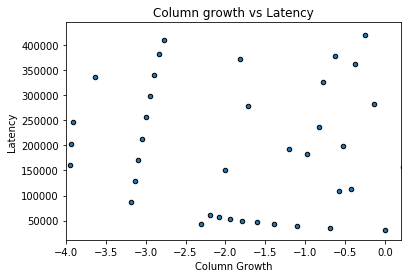

<Figure size 3600x3600 with 0 Axes>

In [39]:
#doing log transformation of the column difference
import numpy as np
X = np.array(changedata.values)
X[:, 3] = np.log(X[:, 3])
#X[:, 3] = np.log(X[:, 3])
plt.scatter(X[:,3], X[:,8], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Column growth vs Latency')
plt.xlim(-4, 0.2)
#plt.ylim (-4, -2) #0,1000
plt.xlabel('Column Growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))

<Figure size 3600x3600 with 0 Axes>

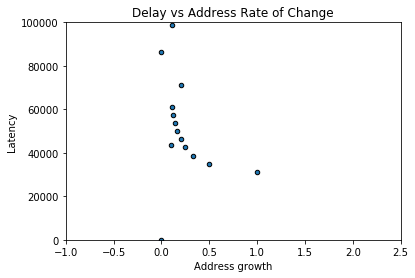

<Figure size 3600x3600 with 0 Axes>

In [36]:
#NO Log transformation here. Direct plotting
import numpy as np
X = np.array(changedata.values)
plt.scatter(X[:,1], X[:,7], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Delay vs Address Rate of Change')
plt.xlim(-1,2.5)
plt.ylim (0, 100000) #0,1000
plt.xlabel('Address growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))

In [ ]:
#import numpy as np
#X = np.array(changedata.values)
#plt.scatter(X[:,3], X[:,8], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#plt.title('Delay vs Column Growth')
#plt.xlim(-1,2.5)
#plt.ylim (0, 100000) #0,1000
#plt.xlabel('Column growth')
#plt.ylabel('Latency')
#plt.figure(figsize=(50,50))

In [ ]:
#import numpy as np
#X = np.array(changedata.values)
#plt.scatter(X[:,5], X[:,8], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#plt.title('Delay vs Row Growth')
#plt.xlim(-1,2.5)
#plt.ylim (0, 100000) #0,1000
#plt.xlabel('Row growth')
#plt.ylabel('Latency')
#plt.figure(figsize=(50,50))

In [62]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

X = np.array(newdata.values)
#X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

newdata = pd.read_csv('differencedata.csv')
features= ['Addressdiff','addressgrowth','Columndiff','columngrowth','Rowdiff','rowgrowth','timediff','timegrowth']
X = newdata[features]
Y = newdata['delay']

plt.scatter(X [:,7], Y[:, 0])

TypeError: '(slice(None, None, None), 7)' is an invalid key

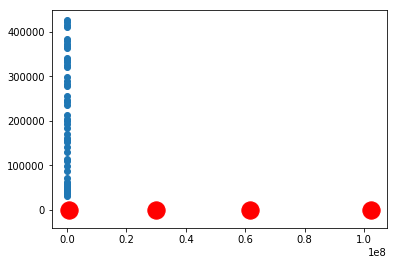

In [54]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,1], X[:,8])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [64]:
#Testing on the standardizing/normalizing the features data and not the target variable (delay)

from sklearn import preprocessing
import numpy as np

newdata = pd.read_csv('differencedata.csv')
#X = np.array(newdata.values)
features= ['Addressdiff','addressgrowth','Columndiff','columngrowth','Rowdiff','rowgrowth','timediff','timegrowth']
X = newdata[features]
Y = newdata['delay']

In [66]:
#x = np.array(X)
#y = preprocessing.scale(X)

<Figure size 3600x3600 with 0 Axes>

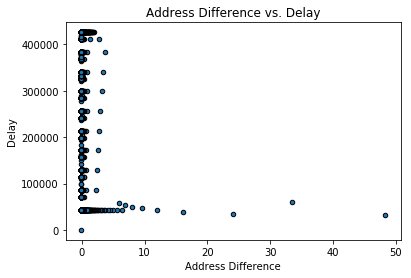

<Figure size 3600x3600 with 0 Axes>

In [157]:
plt.scatter(y, Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#plt.xlim(-2, 4)
#plt.ylim(-2, 4)
plt.title('Address Difference vs. Delay')
plt.xlabel('Address Difference')
plt.ylabel('Delay')
plt.figure(figsize=(50,50))



<Figure size 3600x3600 with 0 Axes>

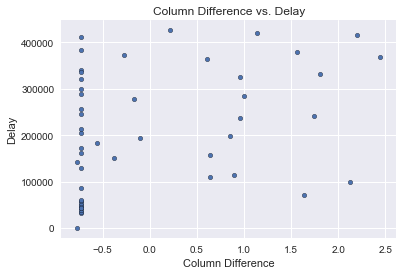

<Figure size 3600x3600 with 0 Axes>

In [40]:
plt.scatter(y[:,1], Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#plt.xlim(-2, 4)
#plt.ylim(-2, 4)
plt.title('Column Difference vs. Delay')
plt.xlabel('Column Difference')
plt.ylabel('Delay')
plt.figure(figsize=(50,50))



<Figure size 3600x3600 with 0 Axes>

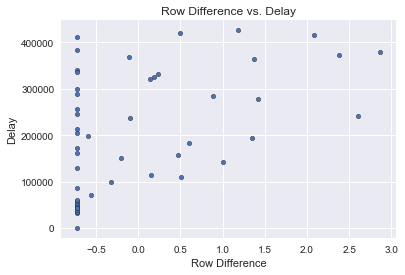

<Figure size 3600x3600 with 0 Axes>

In [41]:
plt.scatter(y[:,2], Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#plt.xlim(-2, 4)
#plt.ylim(-2, 4)
plt.title('Row Difference vs. Delay')
plt.xlabel('Row Difference')
plt.ylabel('Delay')
plt.figure(figsize=(50,50))



<Figure size 3600x3600 with 0 Axes>

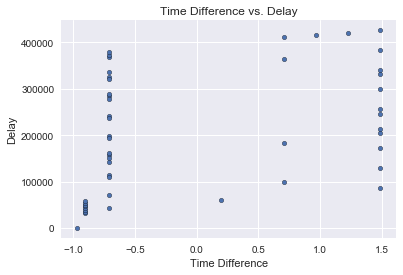

<Figure size 3600x3600 with 0 Axes>

In [46]:
plt.scatter(y[:,3], Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#plt.xlim(-2, 4)
#plt.ylim(-2, 4)
plt.title('Time Difference vs. Delay')
plt.xlabel('Time Difference')
plt.ylabel('Delay')
plt.figure(figsize=(50,50))

In [43]:
changedata.skew()

address    1.385132
column     1.042466
row        1.385142
time       0.617453
delay      0.122178
dtype: float64

In [44]:
changedata.kurtosis()

address    1.026313
column    -0.320049
row        1.026290
time      -1.517104
delay     -1.313743
dtype: float64

In [47]:
x = np.array(X) #X only contains the features so normalizing the features
y = preprocessing.scale(X) #y contains normalized featrues but not the delay

changedata['address'] = np.log(changedata['address'])
print (changedata['address'])

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0        4.158883
1        4.158883
3        4.158883
5        4.158883
7        4.158883
9        4.158883
11       4.158883
13       4.158883
15       4.158883
17       4.158883
19      15.484080
21      17.148417
23      17.459680
25      15.256323
27      18.483114
29      17.757250
31      17.184381
33      16.785891
35       4.158883
37       4.158883
39       4.158883
41       4.158883
43       4.158883
45       4.158883
47       4.158883
49       4.158883
51       4.158883
73      17.923492
237     17.234425
239      4.158883
759      4.158883
761      4.158883
763      4.158883
971     16.362483
1629    18.412874
1631    18.310852
1733    17.824649
1735    17.560758
2103    17.490885
2105    16.628223
2107    18.008413
2109    16.811739
2111    18.043577
2113    17.127333
2115    18.018440
2117    18.558976
2119    17.482151
2499     4.158883
2997         -inf
Name: address, dtype: float64


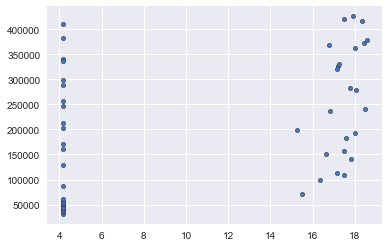

In [49]:
plt.scatter(changedata['address'], Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [40]:
changedata['column'] = np.log(changedata['column'])
#print (changedata['column'])

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
#plt.scatter(changedata['column'], Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [42]:
changedata['row'] = np.log(changedata['row'])
#print (changedata['row'])

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
changedata['time'] = np.log(changedata['time'])
#plt.scatter(changedata['time'], Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
import numpy as np
X = np.array(changedata.values)
X[:, 7] = np.log(X[:, 7])
print (X[:, 7])

timegrowthlog = np.zeros(0,1000)
for i in range (0, 5136):
    timegrowthlog[i] = X[:,i]
    #print timegrowthlog[i]
#X[:, 3] = np.log(X[:, 3])
plt.scatter(X[:,7], X[:,8], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Time growth vs Latency')
#plt.ylim (-4, -2) #0,1000
plt.xlabel('Time Growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


[ 0.         -0.69314718 -1.09861229 -1.38629436 -1.60943791 -1.79175947
 -1.94591015 -2.07944154 -0.36772478 -2.01490302 -4.60015764 -4.61015773
 -4.6200588  -4.6298628  -4.63957161 -4.64918707 -4.65871095 -4.66814499
 -2.85558564 -2.55681923 -2.63151012 -2.70100792 -2.76598804 -2.82700214
 -2.88450664 -2.93888341 -2.99045522 -3.19544557 -5.49349453 -7.76556908
 -6.41613011 -6.41776374 -8.66922735 -7.00418371 -9.53564332 -7.52128188
 -9.57910692 -7.70775417 -9.78866575 -9.78872184 -9.78877791 -9.78883399
 -9.78889006 -9.78894613 -7.91750833 -9.78936655 -7.64977665 -9.95842545
        -inf]


TypeError: data type not understood

In [21]:
import numpy as np

Z = np.array(newdata.timegrowth)

Z = np.log(Z)
p = np.zeros(6000)
for i in range (0, 5137):
    p[i] = Z[i]
    print (p[i])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


0.0
-0.6931471805599453
-1.0986122886681098
-1.3862943611198906
-1.6094379124341003
-1.791759469228055
-1.9459101490553135
-2.0794415416798357
-0.3677247801253174
-2.0149030205422647
-2.1400661634962708
-2.2512917986064953
-2.3513752571634776
-2.4423470353692047
-2.5257286443082556
-2.6026896854443837
-2.6741486494265287
-2.740840023925201
-2.803360380906535
-2.8622008809294686
-2.917770732084279
-2.9704144655697013
-3.0204248861443626
-3.0680529351336174
-3.1135153092103742
-3.1570004211501135
-3.1986731175506815
-3.2386784521643803
-3.2771447329921766
-3.3141860046725258
-3.349904087274605
-3.3843902633457743
-3.417726683613366
-3.4499875458315876
-3.481240089335692
-3.5115454388310208
-3.5409593240373143
-3.56953269648137
-3.597312260588446
-3.624340932976365
-3.6506582412937383
-3.676300671907076
-3.7013019741124933
-3.7256934272366524
-3.7495040759303713
-3.7727609380946383
-3.7954891891721947
-3.817712325956905
-3.8394523125933104
-3.8607297110405954
-3.8815637979434374
-3.901972

-5.938507820121734
-5.9411403121165405
-5.943765892288582
-5.946384596837943
-5.948996461681058
-5.951601522453669
-5.954199814513741
-5.956791372944341
-5.959376232556481
-5.961954427891926
-5.964525993225959
-5.967090962570118
-5.969649369674894
-5.972201248032398
-5.974746630878989
-5.97728555119787
-5.979818041721658
-5.982344134934912
-5.9848638630766295
-5.987377258142727
-5.989884351888464
-5.992385175830861
-5.9948797612510685
-5.997368139196722
-5.999850340484256
-6.0023263957011945
-6.004796335208414
-6.007260189142375
-6.009717987417333
-6.0121697597275086
-6.014615535549252
-6.017055344143159
-8.268603618770552
-8.268860029028367
-8.269116373556816
-8.269372652389587
-8.269628865560346
-8.26988501310273
-8.270141095050352
-8.270397111436798
-8.270653062295631
-8.270908947660384
-8.271164767564569
-8.271420522041666
-8.271676211125135
-8.27193183484841
-8.272187393244893
-8.272442886347969
-8.272698314190992
-8.272953676807294
-8.273208974230176
-8.27346420649292
-8.27371937

-6.461385936129978
-6.462947345002079
-6.464506319676798
-6.4660628677320275
-6.467616996710332
-6.469168714119159
-6.470718027431068
-8.722172772102777
-8.722335691620895
-8.722498584600567
-8.722661451050438
-8.72282429097915
-8.722987104395335
-8.723149891307626
-8.723312651724653
-8.723475385655036
-8.723638093107395
-8.723800774090348
-8.723963428612501
-8.724126056682465
-8.72428865830884
-8.724451233500224
-8.72461378226521
-8.72477630461239
-8.724938800550351
-8.72510127008767
-8.725263713232927
-6.854516774060651
-8.726481196440007
-8.726643415598444
-8.726805608446096
-8.726967774991493
-8.727129915243166
-8.72729202920964
-8.727454116899434
-8.727616178321068
-8.72777821348305
-8.727940222393896
-8.728102205062104
-8.728264161496178
-8.728426091704613
-8.728587995695898
-8.728749873478527
-8.72891172506098
-8.729073550451737
-8.729235349659273
-8.729397122692061
-8.729558869558568
-8.729720590267258
-8.729882284826589
-8.730043953245016
-8.73020559553099
-8.730367211692958
-

-9.025455532779063
-9.025575833531088
-9.025696119812583
-9.025816391627028
-9.025936648977904
-9.026056891868688
-9.026177120302856
-9.026297334283887
-9.026417533815254
-9.02653771890043
-9.026657889542888
-9.026778045746095
-9.026898187513526
-9.027018314848645
-9.02713842775492
-9.02725852623582
-9.027378610294805
-9.02749867993534
-9.027618735160889
-9.027738775974909
-9.027858802380862
-9.027978814382207
-9.0280988119824
-9.028218795184895
-9.028338763993148
-9.028458718410613
-9.028578658440741
-9.028698584086985
-9.028818495352793
-9.028938392241612
-9.02905827475689
-9.029178142902074
-9.029297996680608
-9.029417836095936
-9.029537661151497
-9.029657471850737
-9.02977726819709
-9.029897050194
-9.030016817844901
-9.03013657115323
-9.03025631012242
-9.030376034755907
-9.03049574505712
-9.030615441029495
-9.030735122676457
-9.030854790001436
-9.03097444300786
-9.031094081699155
-9.031213706078747
-9.031333316150057
-9.03145291191651
-9.031572493381526
-9.031692060548524
-9.031811

-7.031090126234658
-7.031973703384244
-7.0328565005144075
-7.0337385190011315
-7.034619760216762
-7.0355002255300185
-7.036379916306011
-7.037258833906248
-7.038136979688651
-7.039014355007569
-7.039890961213788
-7.040766799654546
-7.041641871673541
-7.042516178610951
-7.043389721803439
-7.044262502584169
-7.045134522282816
-7.046005782225584
-7.046876283735208
-7.047746028130974
-7.04861501672873
-7.049483250840896
-7.050350731776474
-7.051217460841064
-7.052083439336877
-7.052948668562739
-7.05381314981411
-7.0546768843830945
-7.055539873558449
-7.056402118625598
-7.057263620866642
-7.058124381560376
-7.058984401982287
-7.059843683404582
-7.060702227096187
-7.061560034322764
-7.062417106346721
-7.06327344442722
-7.064129049820195
-7.064983923778357
-7.065838067551205
-7.066691482385044
-7.067544169522987
-7.068396130204969
-7.0692473656677635
-7.070097877144982
-7.070947665867096
-7.071796733061441
-7.0726450799522285
-7.073492707760557
-7.074339617704422
-7.07518581099873
-7.0760312

-7.265503331144752
-7.266202336011063
-7.266900852610852
-7.267598881625767
-7.268296423736029
-7.268993479620439
-7.269690049956378
-7.270386135419813
-7.2710817366853
-7.271776854425986
-7.272471489313618
-7.273165642018546
-7.273859313209721
-7.2745525035547045
-7.2752452137196695
-7.275937444369409
-7.276629196167332
-7.277320469775475
-7.2780112658545
-7.278701585063705
-7.279391428061017
-7.280080795503008
-7.2807696880448916
-7.281458106340526
-7.282146051042423
-7.282833522801747
-7.28352052226832
-7.284207050090627
-9.535571087373741
-9.53564332083231
-7.521281884980048
-7.28557869338971
-7.286263810156795
-7.286948457860241
-7.287632637141894
-7.288316348642287
-7.288999593000635
-7.289682370854848
-7.290364682841529
-7.291046529595979
-7.2917279117522
-7.292408829942896
-7.2930892847994855
-7.293769276952094
-7.294448807029565
-7.2951278756594595
-7.295806483468061
-7.29648463108038
-7.297162319120155
-7.2978395482098595
-9.5492026074164
-9.549273862938731
-9.549345113384078

-9.657938614684664
-9.658002528784136
-9.658066438798857
-9.658130344729349
-9.658194246576134
-9.658258144339733
-9.658322038020671
-7.786935070566268
-9.658801110545443
-9.658864969544794
-9.658928824466434
-9.658992675310882
-9.659056522078663
-9.659120364770292
-9.659184203386292
-9.659248037927183
-9.659311868393488
-9.659375694785721
-9.659439517104408
-9.659503335350067
-9.659567149523216
-9.659630959624376
-9.659694765654068
-9.65975856761281
-9.659822365501121
-9.659886159319521
-9.659949949068531
-9.660013734748668
-9.66007751636045
-9.660141293904399
-9.660205067381032
-9.660268836790868
-9.660332602134424
-9.660396363412222
-7.7890085357492165
-7.410124192729905
-7.4107291052748145
-7.411333652121743
-7.411937833712583
-7.412541650488434
-7.4131451028895885
-7.41374819135555
-7.414350916325024
-7.414953278235921
-7.415555277525366
-7.41615691462969
-7.41675818998444
-7.417359104024377
-7.417959657183478
-7.418559849894939
-7.419159682591177
-7.41975915570383
-7.420358269663

-9.809973259161984
-9.810028158969848
-9.810083055763888
-9.810137949544437
-9.810192840311824
-9.81024772806638
-9.810302612808435
-9.810357494538321
-9.810412373256368
-9.810467248962906
-9.810522121658266
-9.81057699134278
-9.810631858016777
-9.810686721680586
-9.810741582334538
-9.810796439978965
-9.810851294614196
-9.81090614624056
-9.810960994858387
-9.811015840468011
-9.811070683069758
-9.811125522663959
-9.811180359250942
-9.811235192831042
-9.811290023404583
-9.811344850971897
-9.811399675533314
-9.811454497089164
-9.811509315639775
-9.811564131185477
-9.8116189437266
-9.811673753263474
-9.811728559796427
-9.811783363325787
-9.811838163851887
-9.811892961375051
-9.811947755895613
-9.8120025474139
-9.812057335930241
-9.812112121444965
-9.8121669039584
-9.812221683470876
-9.812276459982721
-9.812331233494264
-9.812386004005836
-9.81244077151776
-9.81249553603037
-9.812550297543993
-7.941103997403299
-7.562134275560975
-7.562653905268138
-7.563173265100496
-7.56369235533823
-7.56

-7.68126900141534
-7.681730284031951
-7.682191353965013
-7.68265221141056
-7.683112856564355
-7.683573289621888
-7.684033510778384
-7.684493520228795
-7.684953318167805
-7.685412904789829
-7.685872280289017
-7.686331444859246
-7.686790398694132
-7.687249141987021
-7.6877076749309925
-7.688165997718864
-7.688624110543184
-7.6890820135962406
-7.689539707070054
-7.689997191156383
-7.690454466046723
-7.690911531932307
-7.691368389004105
-7.691825037452826
-7.692281477468919
-7.692737709242569
-7.693193732963705
-7.693649548821994
-7.694105157006843
-7.694560557707401
-9.945900281167734
-9.945948203724893
-9.945996123985587
-9.94604404195004
-9.946091957618474
-9.946139870991106
-9.946187782068156
-9.946235690849845
-9.946283597336391
-9.946331501528018
-9.946379403424942
-9.946427303027384
-9.946475200335565
-9.946523095349702
-9.946570988070018
-9.946618878496732
-9.946666766630061
-9.946714652470227
-9.94676253601745
-8.075271546297458
-9.94712158955619
-9.947169453622251
-9.947217315397

-10.06628644284122
-10.066328930041957
-10.066371415437608
-10.066413899028326
-10.066456380814268
-10.066498860795583
-10.066541338972426
-10.06658381534495
-10.066626289913309
-10.066668762677654
-10.066711233638141
-10.066753702794923
-10.066796170148152
-10.06683863569798
-10.066881099444563
-10.066923561388053
-10.066966021528604
-10.067008479866365
-10.067050936401493
-10.067093391134142
-10.067135844064461
-10.067178295192607
-10.06722074451873
-10.067263192042985
-10.067305637765523
-10.067348081686498
-10.067390523806065
-10.067432964124373
-10.067475402641579
-10.067517839357832
-10.067560274273285
-10.067602707388096
-10.067645138702412
-10.067687568216387
-10.067729995930177
-10.067772421843932
-10.067814845957804
-10.067857268271947
-10.067899688786515
-10.067942107501658
-10.06798452441753
-10.068026939534285
-10.068069352852072
-10.068111764371048
-10.068154174091362
-10.068196582013169
-10.068238988136619
-10.068281392461866
-10.068323794989062
-10.068366195718362
-8.19

In [22]:
print (d)

with open('timecluster1.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['address', 'addressgrowth', 'column', 'columngrowth', 'row', 'rowgrowth', 'time', 'timegrowth', 'growthlog' ,'delay'])
    
    for i in range (0, 5136):
        print("in for loop")
        #print(d[i])
        if (p[i] < 0):
            print("entered first if..")
            if (p[i] > -2):
                print ("entered second if..")
                print("i am inside the file")
                print (d[i])
                writer.writerow ([w[i], a[i], x[i], b[i], y[i], c[i], t[i], d[i], p[i], z[i]])
        i = i+1
        
        


[1.         0.5        0.33333333 ... 0.         0.         0.        ]
in for loop
in for loop
entered first if..
entered second if..
i am inside the file
0.5
in for loop
entered first if..
entered second if..
i am inside the file
0.3333333333333333
in for loop
entered first if..
entered second if..
i am inside the file
0.25
in for loop
entered first if..
entered second if..
i am inside the file
0.2
in for loop
entered first if..
entered second if..
i am inside the file
0.16666666666666666
in for loop
entered first if..
entered second if..
i am inside the file
0.14285714285714285
in for loop
entered first if..
in for loop
entered first if..
entered second if..
i am inside the file
0.6923076923076923
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop

in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for l

entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered 

in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for l

in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for l

in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for l

in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for l

in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for l

in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for l

entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered 

entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered 

in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for l

in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for loop
entered first if..
in for l

In [23]:
with open('timecluster2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['address', 'addressgrowth', 'column', 'columngrowth', 'row', 'rowgrowth', 'time', 'timegrowth', 'growthlog' ,'delay'])
    
    for i in range (0, 5136):

        if (p[i] < -2):
 
            if (p[i] > -4):
   
                writer.writerow ([w[i], a[i], x[i], b[i], y[i], c[i], t[i], d[i], p[i], z[i]])
        i = i+1

In [24]:
cluster2 = pd.read_csv('timecluster2.csv')

<Figure size 3600x3600 with 0 Axes>

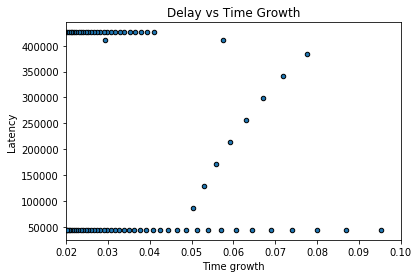

<Figure size 3600x3600 with 0 Axes>

In [32]:
import numpy as np
X = np.array(cluster2.values)
plt.scatter(X[:,7], X[:,9], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Delay vs Time Growth')
plt.xlim(0.02,0.10)
#plt.ylim (0, 100000) #0,1000
plt.xlabel('Time growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))

#Results: Column and Time growth are following same trends with latency

<Figure size 3600x3600 with 0 Axes>

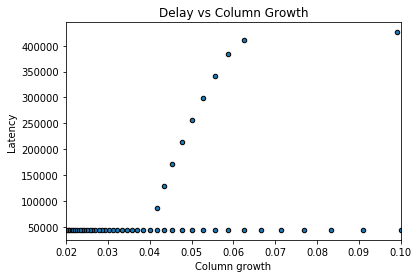

<Figure size 3600x3600 with 0 Axes>

In [31]:
import numpy as np
X = np.array(cluster2.values)
plt.scatter(X[:,3], X[:,9], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Delay vs Column Growth')
plt.xlim(0.02,0.10)
#plt.ylim (0, 100000) #0,1000
plt.xlabel('Column growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))

#Results: Column and Time growth are following same trends with latency

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.87542738e-01
  5.24660825e-01 -2.48485

<Figure size 3600x3600 with 0 Axes>

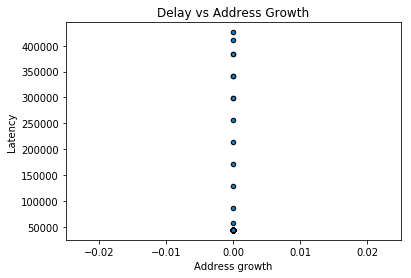

<Figure size 3600x3600 with 0 Axes>

In [41]:
import numpy as np
X = np.array(cluster2.values)
print (X[:,5])
plt.scatter(X[:,5], X[:,9], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Delay vs Address Growth')
plt.xlim(-0.025, 0.025)
#plt.ylim (0, 100000) #0,1000
plt.xlabel('Address growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))

#Results: Column and Time growth are following same trends with latency

In [57]:
with open('timecluster3.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['address', 'addressgrowth', 'column', 'columngrowth', 'row', 'rowgrowth', 'time', 'timegrowth', 'growthlog' ,'delay'])
    
    for i in range (0, 5136):

        if (p[i] < -4):
 
            if (p[i] > -6):
   
                writer.writerow ([w[i], a[i], x[i], b[i], y[i], c[i], t[i], d[i], p[i], z[i]])
        i = i+1

<Figure size 3600x3600 with 0 Axes>

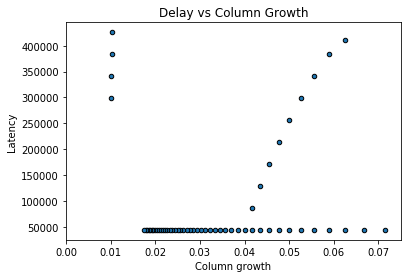

<Figure size 3600x3600 with 0 Axes>

In [72]:
cluster3 = pd.read_csv('timecluster3.csv')

import numpy as np
X = np.array(cluster2.values)
plt.scatter(X[:,3], X[:,9], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Delay vs Column Growth')
plt.xlim(0,0.075)
#plt.ylim (0, 100000) #0,1000
plt.xlabel('Column growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))

#Results: Column and Time growth are following same trends with latency

<Figure size 3600x3600 with 0 Axes>

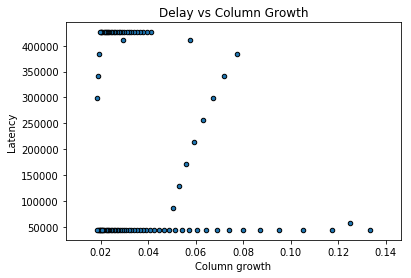

<Figure size 3600x3600 with 0 Axes>

In [74]:
import numpy as np
X = np.array(cluster2.values)
plt.scatter(X[:,7], X[:,9], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Delay vs Column Growth')
#plt.xlim(0,0.075)
#plt.ylim (0, 100000) #0,1000
plt.xlabel('Column growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))

#Results: Column and Time growth are following same trends with latency

In [75]:
with open('timecluster4.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['address', 'addressgrowth', 'column', 'columngrowth', 'row', 'rowgrowth', 'time', 'timegrowth', 'growthlog' ,'delay'])
    
    for i in range (0, 5136):

        if (p[i] < -6):
 
            if (p[i] > -8):
   
                writer.writerow ([w[i], a[i], x[i], b[i], y[i], c[i], t[i], d[i], p[i], z[i]])
        i = i+1

<Figure size 3600x3600 with 0 Axes>

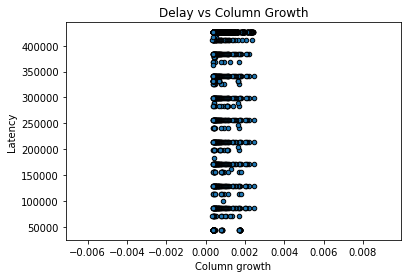

<Figure size 3600x3600 with 0 Axes>

In [95]:
cluster4 = pd.read_csv('timecluster4.csv')

import numpy as np
X = np.array(cluster4.values)
plt.scatter(X[:,7], X[:,9], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Delay vs Column Growth')
#plt.xlim(-60, 0)
#plt.ylim (0, 100000) #0,1000
plt.xlabel('Column growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))

#Results: Column and Time growth are following same trends with latency